# Final Project

Karsen Webber. "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

### Install Packages. 

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#pip install scikit-plot (optional)
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

## 1. Business Understanding

* Every year, film studios in America producs hundreds of movies that help make the U.S. one of the top producers in the world. The budgets for these movies are extremely expensive, making the box office success of these films essential to the firm's survival in the production industry. 
* To try and manage budget spending, production firms rely heavily on predictions of movie success. By having the knowledge of which movies are most likely to succeed, production firms can plan their advertising efforts accordingly. 
* If the success of a movie was known beforehand, producers would be able to plan release times to maximize profit and know the market better. Therefore, these predictions are very important to productions houses. 
* The goal of this project is to discover the factors that make a movie successful. Although there are many factors that contribute to success, this project will seek to determine these factors through data analysis.

## 2. Data Understanding

### 2.1. Read Data. 

In [560]:
#Read data
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2. Describe data and identify data types. 

This data was collected from information of over 5,000 movies on IMDB. The data consists of many different variables including the genre, imdb score, the directors, the star actors, duration, language, country, etc. There is a mix of categorical and numerical data in this dataset which will have to go through ETL.

In [561]:
#Information on the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [562]:
print(df.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [563]:
#Quick statistic summary of data that shows numerical data. 
df.describe(include = 'all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


The statistical summary above shows that the movies are an average of 110 minutes, earning imdb scores of 6.46 and an average of 9,255 likes on Facebook. The max imdb score was a 9.3 and there is data collected on 3,804 movies.

### 2.3. Identify data quality issues. 

The original dataset is not ready for analysis because there are missing values, unneeded variables, different data types. 

In [564]:
#Many missing values 
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### 2.4. Clean the data. 

This clean code comes from https://github.com/tousif101/MoviePredictor/blob/master/movie_data_clean.py

In [565]:
import pandas as pd
import random

data = pd.read_csv('movie_metadata.csv', index_col=False)

keep_col = ['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
            'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
            'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language',
            'country', 'content_rating', 'budget', 'title_year', 'imdb_score', 'movie_facebook_likes']

new_file = data[keep_col]

new_data = new_file.fillna(new_file.mean())

new_data = new_data[new_data.language == 'English']
new_data = new_data[new_data.country == 'USA']

new_data = new_data[new_data.content_rating != 'TV-14']
new_data = new_data[new_data.content_rating != 'TV-PG']
new_data = new_data[new_data.content_rating != 'TV-MA']
new_data = new_data[new_data.content_rating != 'TV-G']
new_data = new_data[new_data.content_rating != 'TV-Y7']
new_data = new_data[new_data.content_rating != 'Passed']
new_data = new_data[new_data.content_rating != 'Approved']
new_data = new_data[new_data.content_rating != 'Not Rated']
new_data = new_data[new_data.content_rating != 'Unrated']
new_data = new_data[new_data.content_rating != 'NC-17']
new_data = new_data[pd.notnull(new_data['content_rating'])]

new_data = new_data.reset_index()

for i in range(0, len(new_data['genres'])):
    record = new_data.loc[i, 'genres']
    splitVal = record.split('|')
    val = random.choice(splitVal)
    new_data.iloc[i, new_data.columns.get_loc('genres')] = val

new_data = new_data.reset_index()

# for i in range(0, len(new_data['imdb_score'])):
#     rating = float(new_data.loc[i, 'imdb_score'])
#     if rating <= 10 and rating >= 7.5:
#         new_data.iloc[i, new_data.columns.get_loc('imdb_score')] = 4
#     if rating >= 5 and rating <= 7.4:
#         new_data.iloc[i, new_data.columns.get_loc('imdb_score')] = 3
#     if rating >= 2.5 and rating <= 4.9:
#         new_data.iloc[i, new_data.columns.get_loc('imdb_score')] = 2
#
#     if rating >= 1 and rating <= 2.4:
#         new_data.iloc[i, new_data.columns.get_loc('imdb_score')] = 1

# print(new_data['imdb_score'])
cleaned_data = new_data

cleaned_data.to_csv("cleaned_movie_metadata.csv",index =False)

In [566]:
#Information on the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [567]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [568]:
df = df.drop(['director_name', 'color', 'movie_imdb_link', 'actor_2_name', 'actor_3_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 23 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
num_user_for_reviews         3756 non-null float64
language                     3756 non-null object
country                      3756 non-null object
content_rating               3756 non-null object
budget                       3756 non

In [569]:
# The association between language and imdb_score
# create a new data frame
g = df[['language','imdb_score']]
# check your new data frame
g.head()

,language,imdb_score
0,English,7.9
1,English,7.1
2,English,6.8
3,English,8.5
5,English,6.6


In [570]:
#Since the majority of movies are in English, remove category as it is not necessary to analysis. 
df = df.drop(['language'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 22 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
num_user_for_reviews         3756 non-null float64
country                      3756 non-null object
content_rating               3756 non-null object
budget                       3756 non-null float64
title_year                   3756 no

In [571]:
#Drop all columns that are not important to analysis since they are objects
df = df.drop(['genres', 'actor_1_name', 'plot_keywords', 'country', 'content_rating', 'movie_title'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
aspect_ratio                 3756 non-null float64
movie_facebook_likes         3756 non-null int64
dtypes: float64(13), int64(3)
memory usage: 498.8 KB


## 3. Regression Analysis

In [572]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import SelectKBest
import statsmodels.formula.api as sm
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

#model validation
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from statsmodels.formula.api import ols


### 3.1. Data Visualization

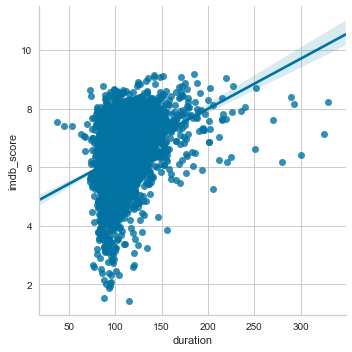

In [573]:
sns.lmplot( "duration", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

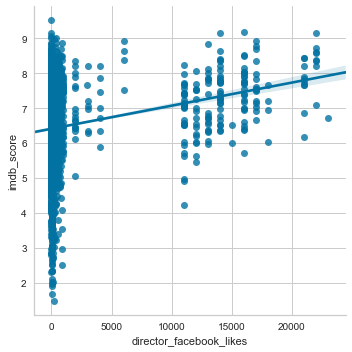

In [574]:
sns.lmplot( "director_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

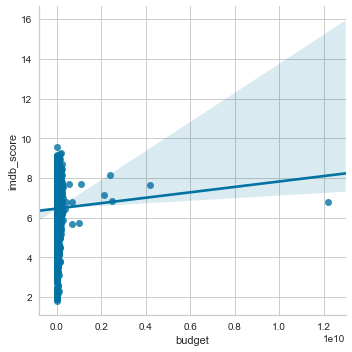

In [575]:
sns.lmplot( "budget", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

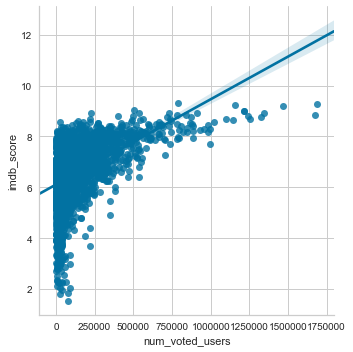

In [576]:
sns.lmplot( "num_voted_users", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

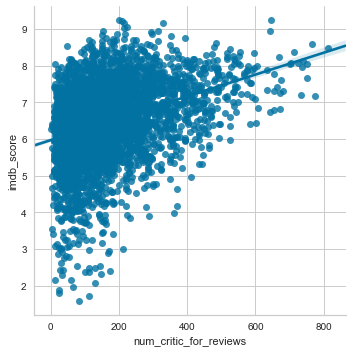

In [577]:
sns.lmplot( "num_critic_for_reviews", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

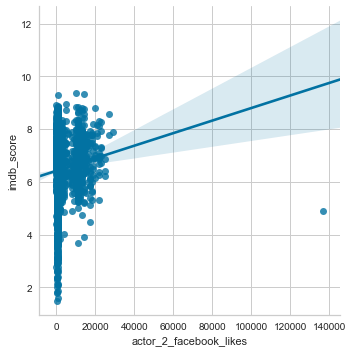

In [578]:
sns.lmplot( "actor_2_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

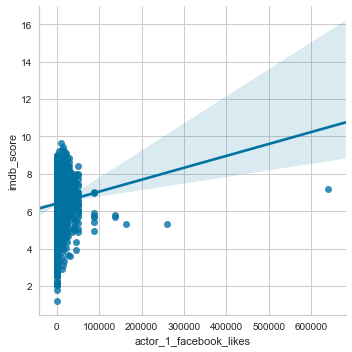

In [579]:
sns.lmplot( "actor_1_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

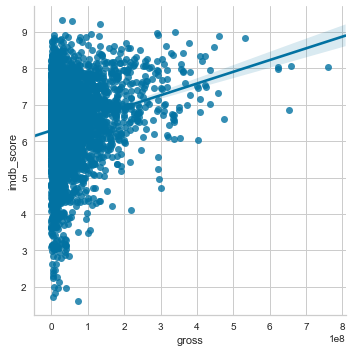

In [580]:
sns.lmplot( "gross", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

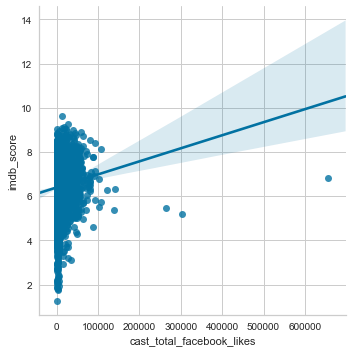

In [581]:
sns.lmplot( "cast_total_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

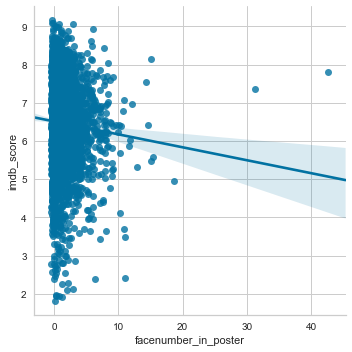

In [582]:
sns.lmplot( "facenumber_in_poster", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

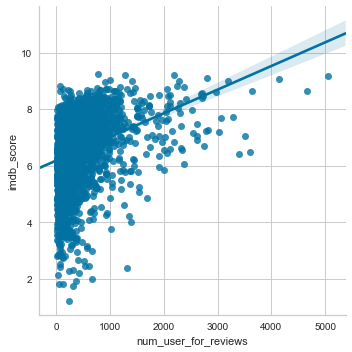

In [583]:
sns.lmplot( "num_user_for_reviews", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

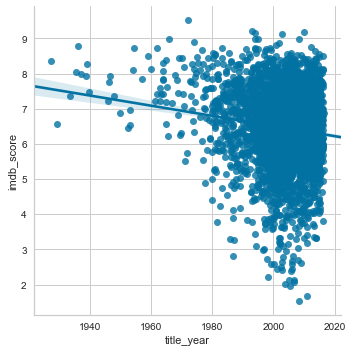

In [584]:
sns.lmplot( "title_year", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

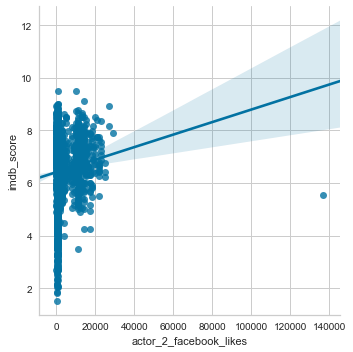

In [585]:
sns.lmplot( "actor_2_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

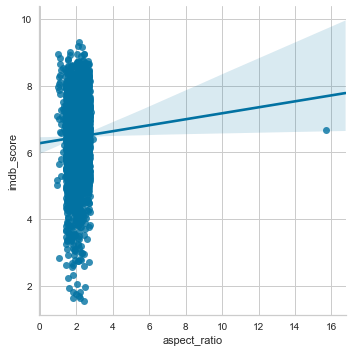

In [586]:
sns.lmplot( "aspect_ratio", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

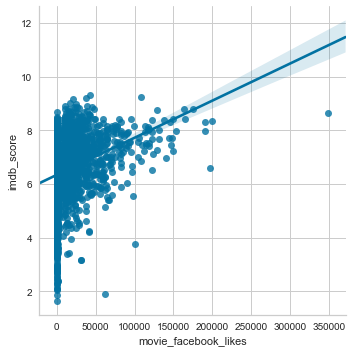

In [587]:
sns.lmplot( "movie_facebook_likes", "imdb_score", df, y_jitter=0.40, x_jitter=.40)

### 3.2. Pivot Tables. 

In [588]:
df.groupby(['duration', 'imdb_score']).size().unstack() 
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [589]:
df.groupby(['actor_1_facebook_likes', 'imdb_score']).size().unstack() 
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


### 3.3. Histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c306ccd30>,
      dtype=object)

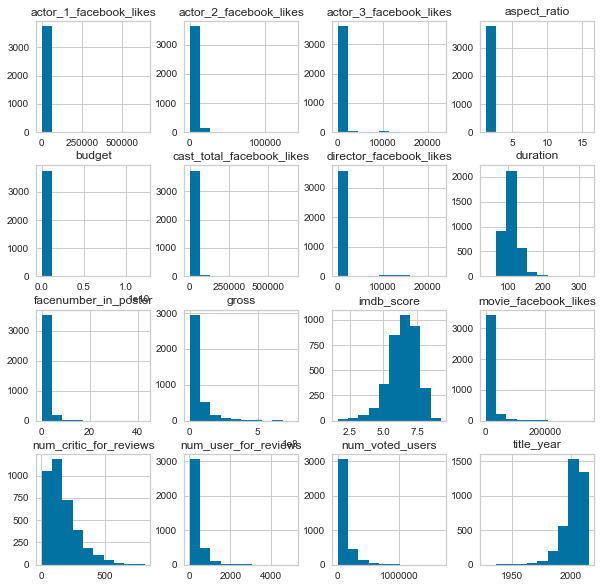

In [590]:
df.hist(figsize=(10,10))

The X variables that seem to affect the imdb_score are num_critic_for_reviews, num_users_for_reviews, num_voted_users and movie_facebook_likes. 

### 3.4. Heat Map & Correlation Analysis. 

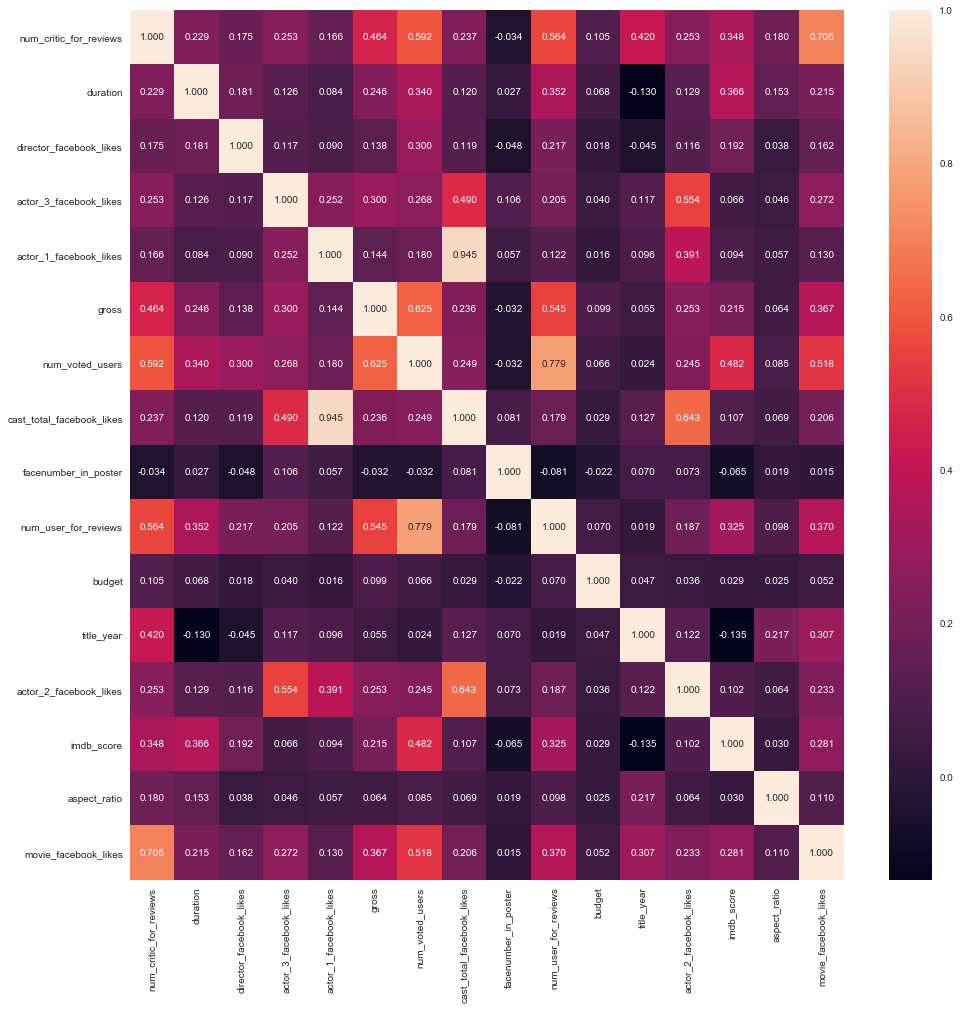

In [591]:
#Heat Map
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot = True, fmt=".3f")

In [592]:
#Correlation Analysis
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


### 3.4. Regression.

In [593]:
#First Model
df_reg_model1 = ols("imdb_score~+num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+num_user_for_reviews+budget+title_year+aspect_ratio+movie_facebook_likes",df)
df_reg1 = df_reg_model1.fit()
#Second Model
df_reg_model2 = ols("imdb_score~+num_critic_for_reviews+num_user_for_reviews+num_voted_users+movie_facebook_likes",df)
df_reg2 = df_reg_model2.fit()

- The first one will have all features.  
- The second model will have as features imdb_score are num_critic_for_reviews, num_users_for_reviews, num_voted_users and movie_facebook_likes. 

In [594]:
print(df_reg1.summary())
print(df_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:55:35   Log-Likelihood:                -4697.3
No. Observations:                3756   AIC:                             9425.
Df Residuals:                    3741   BIC:                             9518.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [595]:
#Third Model
df_reg_model3 = ols("imdb_score~+movie_facebook_likes+num_critic_for_reviews+duration",df)
df_reg3 = df_reg_model3.fit()

In [596]:
print(df_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          6.92e-190
Time:                        15:55:35   Log-Likelihood:                -5095.4
No. Observations:                3756   AIC:                         1.020e+04
Df Residuals:                    3752   BIC:                         1.022e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### 3.5. Lasso Regression. 

In [597]:
y = df['imdb_score'] 
X = df.drop(['imdb_score'], axis =1)

In [598]:
model1 = lm.Lasso(alpha=0.1)         #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

In [599]:
model1

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [600]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.60214051e-03  1.00319870e-02  4.31173828e-06  6.45158448e-05
  6.87291077e-05 -1.91471774e-09  3.71878837e-06 -6.77252414e-05
 -0.00000000e+00 -6.07322924e-04 -3.99096132e-11 -2.18371224e-02
  7.11885856e-05 -0.00000000e+00 -2.14001859e-06]
y-intercept  48.64726992182292


In [601]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.022'),
 ('actor_2_facebook_likes', '0.000'),
 ('aspect_ratio', '-0.000'),
 ('movie_facebook_likes', '-0.000')]

In [602]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7116764133932133
variance or r-squared:  0.3619313006335356


In [603]:
model2 = lm.Ridge(alpha=0.1)         #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model1.predict(X)

In [604]:
model2

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [605]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.022'),
 ('actor_2_facebook_likes', '0.000'),
 ('aspect_ratio', '-0.000'),
 ('movie_facebook_likes', '-0.000')]

### 3.6. Feature Selection.

In [606]:
#select only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [7.70000e+01, 7.26390e+04],
       [8.10000e+01, 5.20550e+04],
       [9.00000e+01, 4.28500e+03]])

In [607]:
# this will help find out which variables are selected
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 6]


In [608]:
# index 1 and 6 refer to duration and num_voted_users respectively
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


f_regression determines that duration and num_voted_users are two most important predictors.

In [609]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.804129664671588
variance or r-squared:  0.2790403621603512


In [610]:
# use f_regression with k = 3 and develop a new regression model
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05],
       [3.02000e+02, 1.69000e+02, 4.71220e+05],
       [6.02000e+02, 1.48000e+02, 2.75868e+05],
       ...,
       [1.43000e+02, 7.70000e+01, 7.26390e+04],
       [5.60000e+01, 8.10000e+01, 5.20550e+04],
       [4.30000e+01, 9.00000e+01, 4.28500e+03]])

In [611]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7987745639710209
variance or r-squared:  0.28384159215010973


In [612]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

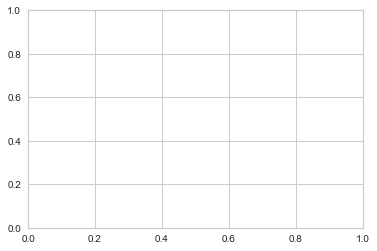

In [613]:
from yellowbrick.model_selection import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

### 3.7. Model Selection and Building.

My best model would be model number 3 of the f_regression method because it has the most impactful variables and the highest r sqaured. This model takes into account the two most important variables. Howbever, even with all of the variable there is still not a perfect model. In order to make a better model I think there would need to be more variables. 

In [614]:
df_model5 = ols("imdb_score~duration+num_voted_users",df)
df5 = df_model5.fit()
print(df5.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     726.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          2.34e-267
Time:                        15:55:36   Log-Likelihood:                -4920.1
No. Observations:                3756   AIC:                             9846.
Df Residuals:                    3753   BIC:                             9865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9912      0.074     

In [615]:
X = df['duration']
y = df['num_voted_users'] 
model5= lm.LinearRegression()
model5.fit(X[:,np.newaxis], y)
model5_y = model5.predict(X[:,np.newaxis])
print ('Coefficients: ', model5.coef_)
print ("y-intercept ", model5.intercept_)

Coefficients:  [2279.80394661]
y-intercept  -145539.86171630875


In [616]:
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

print ("mean square error: ", mean_squared_error(y, model5_y))
print ("variance or r-squared: ", explained_variance_score(y, model5_y))

mean square error:  1.1052198627143394e-20
variance or r-squared:  1.0


## 4. Classification

In [617]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

### 4.1. Decision Tree Model

In [618]:
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [619]:
df1 = df
# setting my own values for bins: 0 = bad, 1 = okay, 2 = good, 3 = excellent
df1['imdbscore_category'] = pd.cut(df1['imdb_score'], bins=[0, 4, 6, 8, 10], labels=[0, 1, 2, 3])
# see the result
df1.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbscore_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,3
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,2


In [620]:
# declare X variables and y variable
y = df['imdbscore_category']
X = df.drop(['imdbscore_category'], axis=1)

print(y.shape, X.shape)

(3756,) (3756, 16)


In [621]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt= DecisionTreeClassifier()

# Train a decision tree model
dt=dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [622]:
print(len(X_train), len(X_test))

2629 1127


In [623]:
y_test

2327    2
1108    2
3977    2
457     2
4418    1
1997    2
96      3
1524    2
4563    1
1994    1
3788    2
4561    2
514     0
3367    1
571     2
710     2
1302    2
2729    1
2312    2
1741    1
591     2
3587    1
1230    2
3470    2
431     1
3865    1
1582    1
747     1
3049    2
2076    2
       ..
730     2
437     2
2438    1
481     1
1131    2
90      2
295     2
1247    1
4662    2
2893    1
4534    1
1217    2
906     2
560     1
3525    0
1916    2
1974    2
3358    1
3418    1
2933    2
2643    2
4832    2
2249    2
3040    1
4427    3
4752    2
1219    2
993     2
4603    2
3529    2
Name: imdbscore_category, Length: 1127, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [624]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

1.0


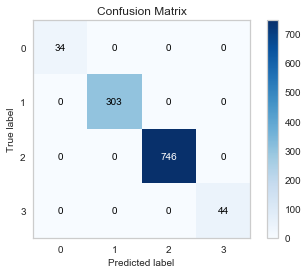

In [625]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [626]:
# install graphviz first (change the cell mode to Code and run the cell)

!pip install graphviz

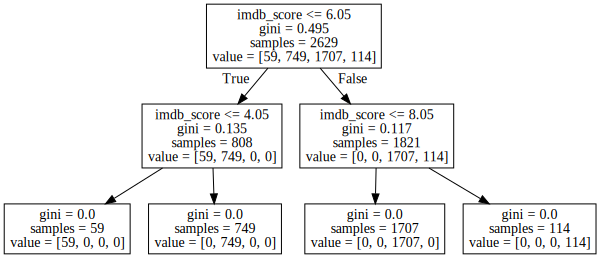

In [627]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

In [628]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt_simple= DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple=dt_simple.fit(X_train, y_train)

dt_simple


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [629]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))

1.0


In [630]:
# evaluate the decision tree model using 10-fold cross-validation
# initialize decision tree algorithm (without fitting)

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [631]:
# https://scikit-learn.org/stable/modules/cross_validation.html
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


### 4.2. Random Forest

In [632]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9982253771073647

In [633]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9982253771073647
[[ 32   2   0   0]
 [  0 303   0   0]
 [  0   0 746   0]
 [  0   0   0  44]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.99      1.00      1.00       303
           2       1.00      1.00      1.00       746
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1127
   macro avg       1.00      0.99      0.99      1127
weighted avg       1.00      1.00      1.00      1127



In [634]:
# another method
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
imdb_score,0.780425
num_voted_users,0.047265
duration,0.027995
num_critic_for_reviews,0.021181
num_user_for_reviews,0.016796
movie_facebook_likes,0.016580
budget,0.014903
title_year,0.014535
gross,0.013945
director_facebook_likes,0.009983


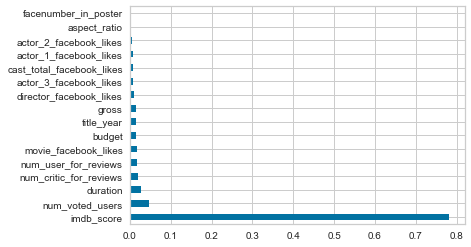

In [635]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

### 4.3. KNN

In [636]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn= KNeighborsClassifier()

# Train a decision tree model
knn=knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [637]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")


1.0
--------------------------------------------------------
[[ 34   0   0   0]
 [  0 303   0   0]
 [  0   0 746   0]
 [  0   0   0  44]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       303
           2       1.00      1.00      1.00       746
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1127
   macro avg       1.00      1.00      1.00      1127
weighted avg       1.00      1.00      1.00      1127

--------------------------------------------------------


In [638]:
# evaluate the knn model using 10-fold cross-validation

scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.56349206 0.43121693 0.4933687  0.49333333 0.42666667 0.41333333
 0.38666667 0.39733333 0.48395722 0.6657754 ]
0.4755143648628436


### Search for the optimal k value (Grid Search)

In [639]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [640]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6440026071509475
{'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')


### 4.4. Logistic Regression

In [641]:
# correlation analysis
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


In [642]:
corr = pd.DataFrame(df.corr()['duration'].drop('duration'))
corr.sort_values(['duration'], ascending = False)

,duration
imdb_score,0.366221
num_user_for_reviews,0.351595
num_voted_users,0.339592
gross,0.245726
num_critic_for_reviews,0.228631
movie_facebook_likes,0.215303
director_facebook_likes,0.180644
aspect_ratio,0.153027
actor_2_facebook_likes,0.128935
actor_3_facebook_likes,0.125797


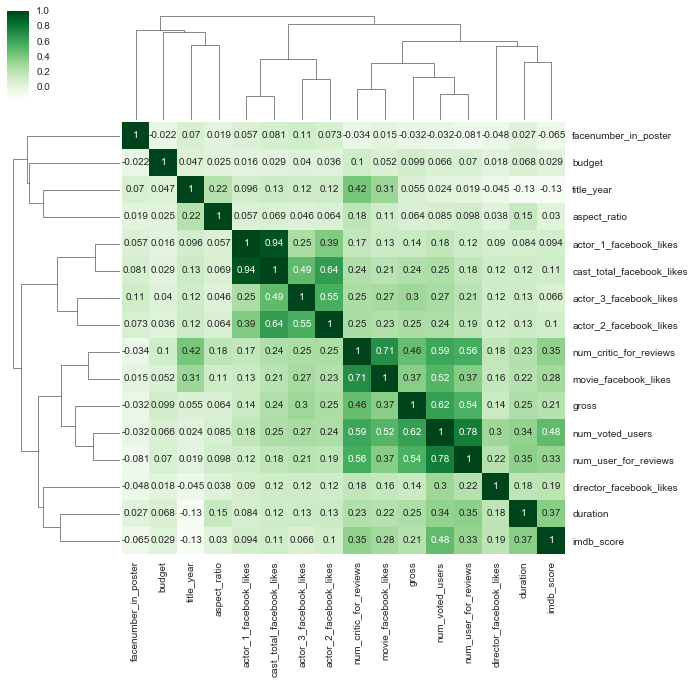

In [643]:
sns.clustermap(data=df.corr(), annot=True, cmap='Greens')

In [644]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [645]:
# evaluate the logit model using 10-fold cross-validation

scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=500), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.65608466 0.69047619 0.67904509 0.664      0.688      0.688
 0.66133333 0.67466667 0.65240642 0.6657754 ]
0.6719787757580861


## 5. Clustering

In [646]:
#pip install scikit-plot (optional)
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 17 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
aspect_ratio                 3756 non-null float64
movie_facebook_likes         3756 non-null int64
imdbscore_category           3756 non-null category
dtypes: category(1), float64(13

In [649]:
df = df.drop(['imdbscore_category'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
num_user_for_reviews         3756 non-null float64
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
aspect_ratio                 3756 non-null float64
movie_facebook_likes         3756 non-null int64
dtypes: float64(13), int64(3)
memory usage: 498.8 KB


In [650]:
# normalize data and save as X
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.685107,0.231201,-0.035102,0.003640,-0.010549,0.930819,0.461851,-0.010192,-0.032029,0.537412,0.015616,0.067679,-0.007925,0.186327,-0.022336,0.067754
1,0.165995,0.200485,-0.010623,0.009944,0.050389,0.337659,0.216251,0.056070,-0.032029,0.178235,0.020774,0.045207,0.021739,0.082431,0.016126,-0.026802
2,0.535908,0.128812,-0.035102,-0.026534,0.005076,0.193899,0.100636,0.000263,-0.008774,0.129976,0.016271,0.135095,-0.011889,0.043470,0.016126,0.216751
3,0.796081,0.183420,0.921420,0.966466,0.030076,0.520072,0.614622,0.145009,-0.032029,0.467594,0.016681,0.101387,0.153126,0.264249,0.016126,0.443112
5,0.363282,0.074205,-0.014449,-0.010490,-0.011111,0.026885,0.062957,-0.014700,-0.008774,0.079343,0.017802,0.101387,-0.010144,0.017496,0.016126,0.041966


In [651]:
# variance test
df.var()

num_critic_for_reviews       1.524041e+04
duration                     5.128738e+02
director_facebook_likes      9.413677e+06
actor_3_facebook_likes       3.588183e+06
actor_1_facebook_likes       2.408499e+08
gross                        4.944602e+15
num_voted_users              2.311476e+10
cast_total_facebook_likes    3.656576e+08
facenumber_in_poster         4.167888e+00
num_user_for_reviews         1.691079e+05
budget                       5.108065e+16
title_year                   9.777468e+01
actor_2_facebook_likes       2.065619e+07
imdb_score                   1.115657e+00
aspect_ratio                 1.246570e-01
movie_facebook_likes         4.606556e+08
dtype: float64

### 5.1. Clustering analysis (k = 2): Include "random_state=0"

In [656]:
# clustering analysis with k = 2
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [657]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [658]:
#clustering results
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [659]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 0.21689628,  0.044379  ,  0.0750573 ,  0.03772906,  0.0077216 ,
         0.08263061,  0.11327753,  0.01268901, -0.00290828,  0.09085565,
         0.00350471,  0.04744576,  0.01490362,  0.10568631,  0.00535094,
         0.06744694],
       [-0.05804885, -0.01187734, -0.0200879 , -0.01009758, -0.00206656,
        -0.02211477, -0.03031694, -0.00339601,  0.00077836, -0.02431607,
        -0.00093798, -0.01269811, -0.00398872, -0.02828527, -0.00143209,
        -0.01805111]])

In [660]:
#add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [661]:
#join the dataframes
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,0


In [662]:
df2.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
3751,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,4500.0,2004.0,133.0,6.9,2.35,171,1
3752,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697,1
3753,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000,1
3754,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0,1
3755,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,2004.0,23.0,6.6,1.85,456,1


### 5.2. Interpretation of Clustering Analysis

In [663]:
#number of observations in each cluster
df2.groupby(['cluster']).size()

cluster
0     795
1    2961
dtype: int64

#### There are 795 observations in cluster 1 and 2,961 in cluster 2. 

In [664]:
#profiling each cluster
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0,343.140881,123.212579,2528.095597,1636.133333,12701.480503,1.153637e+08,296870.555975,19856.091824,1.250314,794.740881,8.909004e+07,2007.212579,4055.101887,7.276478,2.190088,32861.635220
1,120.187774,106.779804,345.329281,539.074637,6422.273219,3.576482e+07,54533.304965,9290.848362,1.411348,213.902060,3.473118e+07,2001.839243,1475.847349,6.247484,2.089784,3042.209726


#### Profile of each cluster.

* In cluster 1, the average num_critic_for_reviews was 343.14 and the num_voted_user was 296,870 people. The imdb_score average was a 7/10. 
* In cluster 2, the average num_critic_for_reviews was 120.18 and the num_voted_user was 54,533 people. The average imdb_score was 6/10. 

In [669]:
#The mean values for "duration" in each cluster. 
df2.groupby('duration').mean().head(5)

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
duration,,,,,,,,,,,,,,,,
37.0,252.0,0.0,199.0,634.0,5923044.0,113451.0,1347.0,0.0,537.0,3600000.0,1987.0,328.0,7.8,1.85,0.0,1.0
45.0,80.0,28.0,104.0,573.0,145109.0,14247.0,1098.0,1.0,44.0,45000000.0,2008.0,197.0,7.3,2.35,0.0,1.0
53.0,84.0,141.0,23.0,141.0,274661.0,10564.0,313.0,0.0,40.0,1000000.0,2007.0,125.0,7.7,1.85,0.0,1.0
63.0,162.0,15.0,69.0,759.0,26687172.0,15600.0,1002.0,0.0,55.0,30000000.0,2011.0,73.0,7.3,1.85,0.0,1.0
66.0,173.0,76.0,36.0,123.0,38108.0,40878.0,239.0,0.0,124.0,2600000.0,2007.0,76.0,7.2,1.85,0.0,1.0


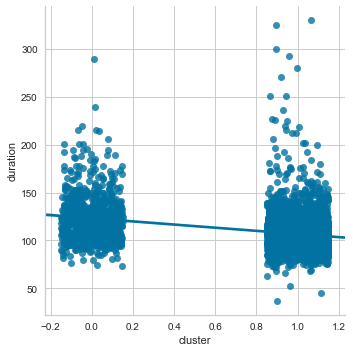

In [666]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

In [667]:
#The mean values for "num_voted_users" in each cluster. 
df2.groupby('num_voted_users').mean().head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
num_voted_users,,,,,,,,,,,,,,,,
91,12.0,88.0,0.0,3.0,268.0,58936.0,318.0,0.0,4.0,1200000.0,2001.0,44.0,6.1,1.78,27.0,1.0
154,29.0,93.0,0.0,59.0,399.0,906666.0,660.0,1.0,5.0,500000.0,2011.0,169.0,6.8,16.00,287.0,1.0
241,10.0,95.0,0.0,309.0,685.0,2468.0,2048.0,3.0,5.0,300000.0,2014.0,665.0,4.8,1.85,261.0,1.0
344,94.0,106.0,5.0,356.0,416.0,2436.0,1611.0,2.0,19.0,2000000.0,2012.0,403.0,5.7,2.35,655.0,1.0
397,7.0,120.0,0.0,40.0,178.0,1098224.0,359.0,1.0,30.0,2000000.0,2003.0,69.0,3.3,1.85,32.0,1.0


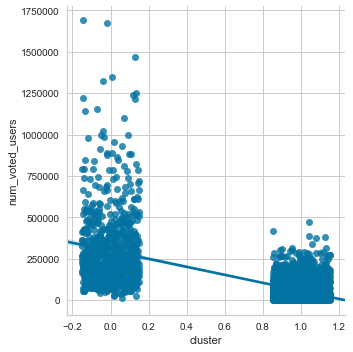

In [668]:
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

### 5.3. Build randomforestclassifier model for feature importance.

In [676]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [677]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,num_critic_for_reviews,0.377551
1,duration,0.019666
2,director_facebook_likes,0.044525
3,actor_3_facebook_likes,0.008387
4,actor_1_facebook_likes,0.007968
5,gross,0.056268
6,num_voted_users,0.128814
7,cast_total_facebook_likes,0.012111
8,facenumber_in_poster,0.003776
9,num_user_for_reviews,0.111919


#### The variable considered most important is the num_critics_for_reviews. The least important variable is the aspect_ratio and any actor facebook likes. 

### 5.4. Clustering analysis using AgglomerativeClustering (# of clusters = 2).

In [678]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [679]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 0, 0])

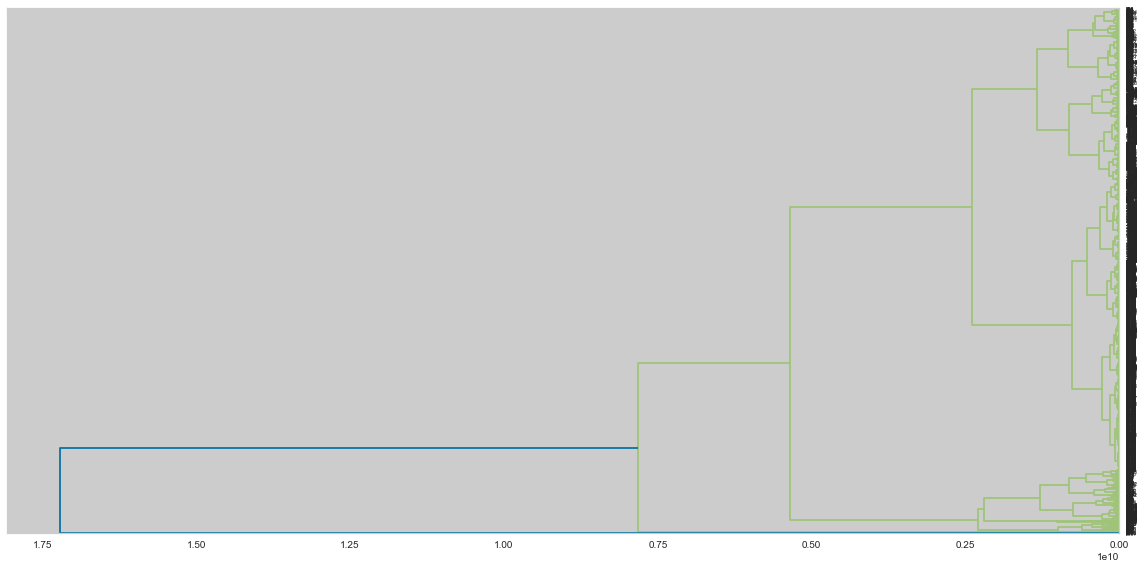

In [680]:
#Visualize the dendogram
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

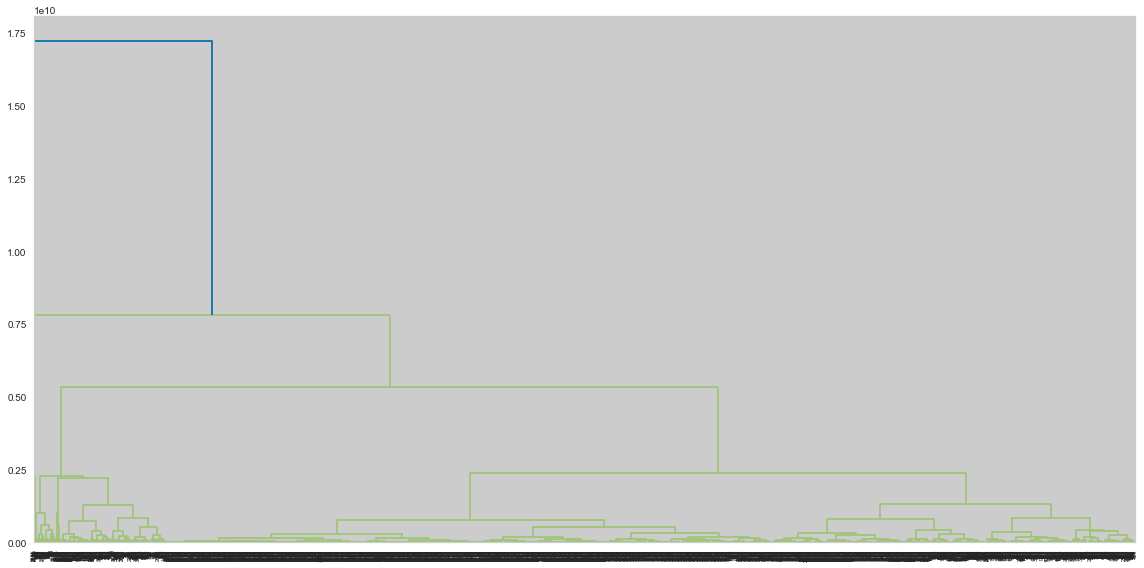

In [681]:
#Visualize dendogram. p= 2. 
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

In [682]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0,343.140881,123.212579,2528.095597,1636.133333,12701.480503,1.153637e+08,296870.555975,19856.091824,1.250314,794.740881,8.909004e+07,2007.212579,4055.101887,7.276478,2.190088,32861.635220
1,120.187774,106.779804,345.329281,539.074637,6422.273219,3.576482e+07,54533.304965,9290.848362,1.411348,213.902060,3.473118e+07,2001.839243,1475.847349,6.247484,2.089784,3042.209726


Text(0.5, 0, 'movie_facebook_likes')

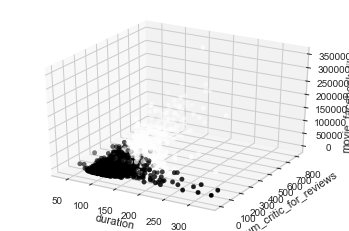

In [683]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2['duration']
y = df2['num_critic_for_reviews']
z = df2['movie_facebook_likes'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('duration')
ax.set_ylabel('num_critic_for_reviews')
ax.set_zlabel('movie_facebook_likes')

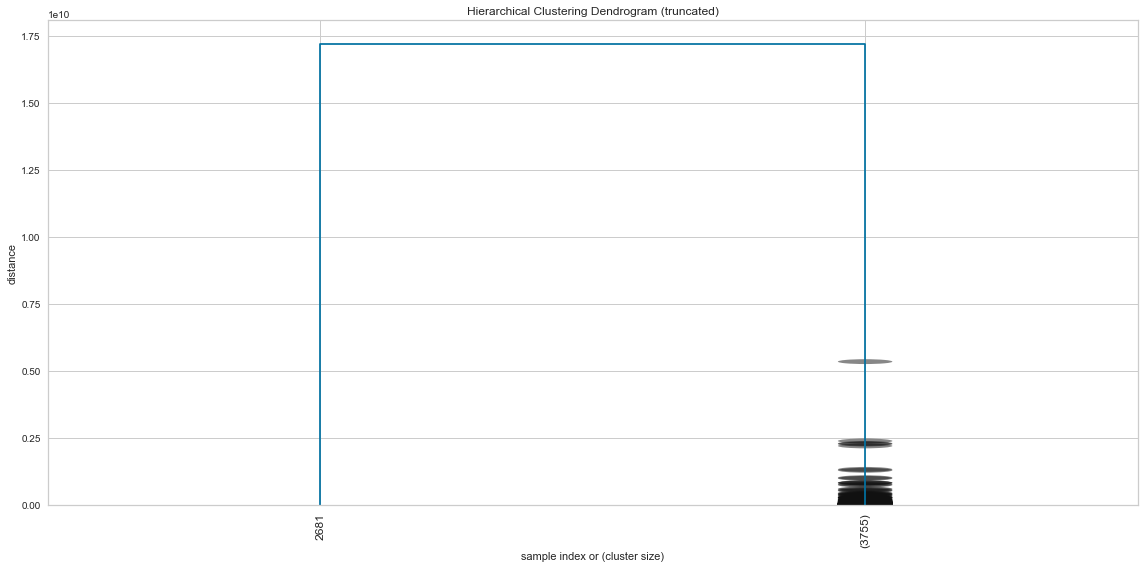

In [684]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

#### The cluster sizes in the hierarchial clustering was 2,681 and 3,755. The cluster means were pretty similar, however. Cluster 1 had higher num_critic_for_reviews, duration and imdb_score than cluster 2, which had lower scores in those categories. 

## 6. Storytelling. 

* The data shows that imdb_score is highly correlated to num_critic_for_reviews and num_voted_users, with movie_facebook_likes also being important variables. 
* Variables such as aspect_ratio and the number of likes an actor got on facebook were not important indicators of a movie's success and should not be a point of focus. 
* The data shows that in order to predict the movie rating, production houses will need to play close attention to the response the movie gets on social media prior to its release. The more people that are actively involved in supporting the movie before it is released, the more likely the movie will be successful. 
* The movie profile of cluster one seems to be most successful, as there are more critical reviews and num_voted_users which means that cluster is more actively involved in the movie's release. Having more people interested in the movie will help predict how successful it will be. 